[![Fixel Algorithms](https://i.imgur.com/AqKHVZ0.png)](https://fixelalgorithms.gitlab.io/)

# PCA Brest Cancer

## UnSupervised Learning - Dimensionality Reduction - Principal Component Analysis 
> Notebook by:
> - Royi Avital RoyiAvital@fixelalgorithms.com

## Revision History

| Version | Date       | User        |Content / Changes                                                   |
|---------|------------|-------------|--------------------------------------------------------------------|
| 1.0.000 | 13/04/2024 | Royi Avital | First version                                                      |

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/AIProgram/2024_02/0063DimensionalityReductionPCA.ipynb)

In [12]:
# Import Packages

# General Tools
import numpy as np
import scipy as sp
import pandas as pd

# Machine Learning
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Miscellaneous
import math
import os
from platform import python_version
import random
import timeit

# Typing
from typing import Callable, Dict, List, Optional, Self, Set, Tuple, Union

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter
from IPython import get_ipython
from IPython.display import Image
from IPython.display import display
from ipywidgets import Dropdown, FloatSlider, interact, IntSlider, Layout, SelectionSlider
from ipywidgets import interact

## Notations

* <font color='red'>(**?**)</font> Question to answer interactively.
* <font color='blue'>(**!**)</font> Simple task to add code for the notebook.
* <font color='green'>(**@**)</font> Optional / Extra self practice.
* <font color='brown'>(**#**)</font> Note / Useful resource / Food for thought.

Code Notations:

```python
someVar    = 2; #<! Notation for a variable
vVector    = np.random.rand(4) #<! Notation for 1D array
mMatrix    = np.random.rand(4, 3) #<! Notation for 2D array
tTensor    = np.random.rand(4, 3, 2, 3) #<! Notation for nD array (Tensor)
tuTuple    = (1, 2, 3) #<! Notation for a tuple
lList      = [1, 2, 3] #<! Notation for a list
dDict      = {1: 3, 2: 2, 3: 1} #<! Notation for a dictionary
oObj       = MyClass() #<! Notation for an object
dfData     = pd.DataFrame() #<! Notation for a data frame
dsData     = pd.Series() #<! Notation for a series
hObj       = plt.Axes() #<! Notation for an object / handler / function handler
```

### Code Exercise

 - Single line fill

 ```python
 vallToFill = ???
 ```

 - Multi Line to Fill (At least one)

 ```python
 # You need to start writing
 ????
 ```

 - Section to Fill

```python
#===========================Fill This===========================#
# 1. Explanation about what to do.
# !! Remarks to follow / take under consideration.
mX = ???

???
#===============================================================#
```

In [13]:
# Configuration
# %matplotlib inline

seedNum = 512
np.random.seed(seedNum)
random.seed(seedNum)

# Matplotlib default color palette
lMatPltLibclr = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
# sns.set_theme() #>! Apply SeaBorn theme

runInGoogleColab = 'google.colab' in str(get_ipython())


In [14]:
# Constants

FIG_SIZE_DEF    = (8, 8)
ELM_SIZE_DEF    = 50
CLASS_COLOR     = ('b', 'r')
EDGE_COLOR      = 'k'
MARKER_SIZE_DEF = 10
LINE_WIDTH_DEF  = 2


In [15]:
# Courses Packages
import sys
sys.path.append('../')
sys.path.append('../../')
sys.path.append('../../../')
from utils.DataVisualization import PlotScatterData


In [16]:
# General Auxiliary Functions

hOrdinalNum = lambda n: '%d%s' % (n, 'tsnrhtdd'[(((math.floor(n / 10) %10) != 1) * ((n % 10) < 4) * (n % 10))::4])


## Dimensionality Reduction by PCA

In this exercise we'll use the PCA approach for dimensionality reduction within a pipeline.

This exercise introduces:

1. Working with the [Breast Cancer Wisconsin Data Set](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html).
1. Combine the PCA as a transformer in a pipeline with a linear classifier to predict the binary class of the data.  
2. Select the best features using a sequential approach.

The objective is to optimize the feature selection in order to get the best classification accuracy.


* <font color='brown'>(**#**)</font> PCA is the most basic dimensionality reduction operator.
* <font color='brown'>(**#**)</font> The PCA output is a linear combination of the input.

In [17]:
# Parameters

# Data

# Model
numComp  = 2
paramC   = 1
numKFold = 5
numFeat  = 5


## Generate / Load Data

In this notebook we'll use the [Breast Cancer Wisconsin Data Set](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html).

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.


![](https://i.imgur.com/4LE2biE.png)

In [18]:
# Load Data

mX, vY   = load_breast_cancer(return_X_y = True)
dfX, dsY = load_breast_cancer(return_X_y = True, as_frame = True)

print(f'The features data shape: {mX.shape}')


The features data shape: (569, 30)


In [19]:
# Merge Label Data
dfData = dfX.copy()
dfData['Label'] = pd.Categorical(dsY)

dfData

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


## Exploratory Data Analysis (EDA)

### Correlation Matrix

The correlation matrix is appropriate tool to filter features which are highly correlated.  
It is less effective for _feature selection_.

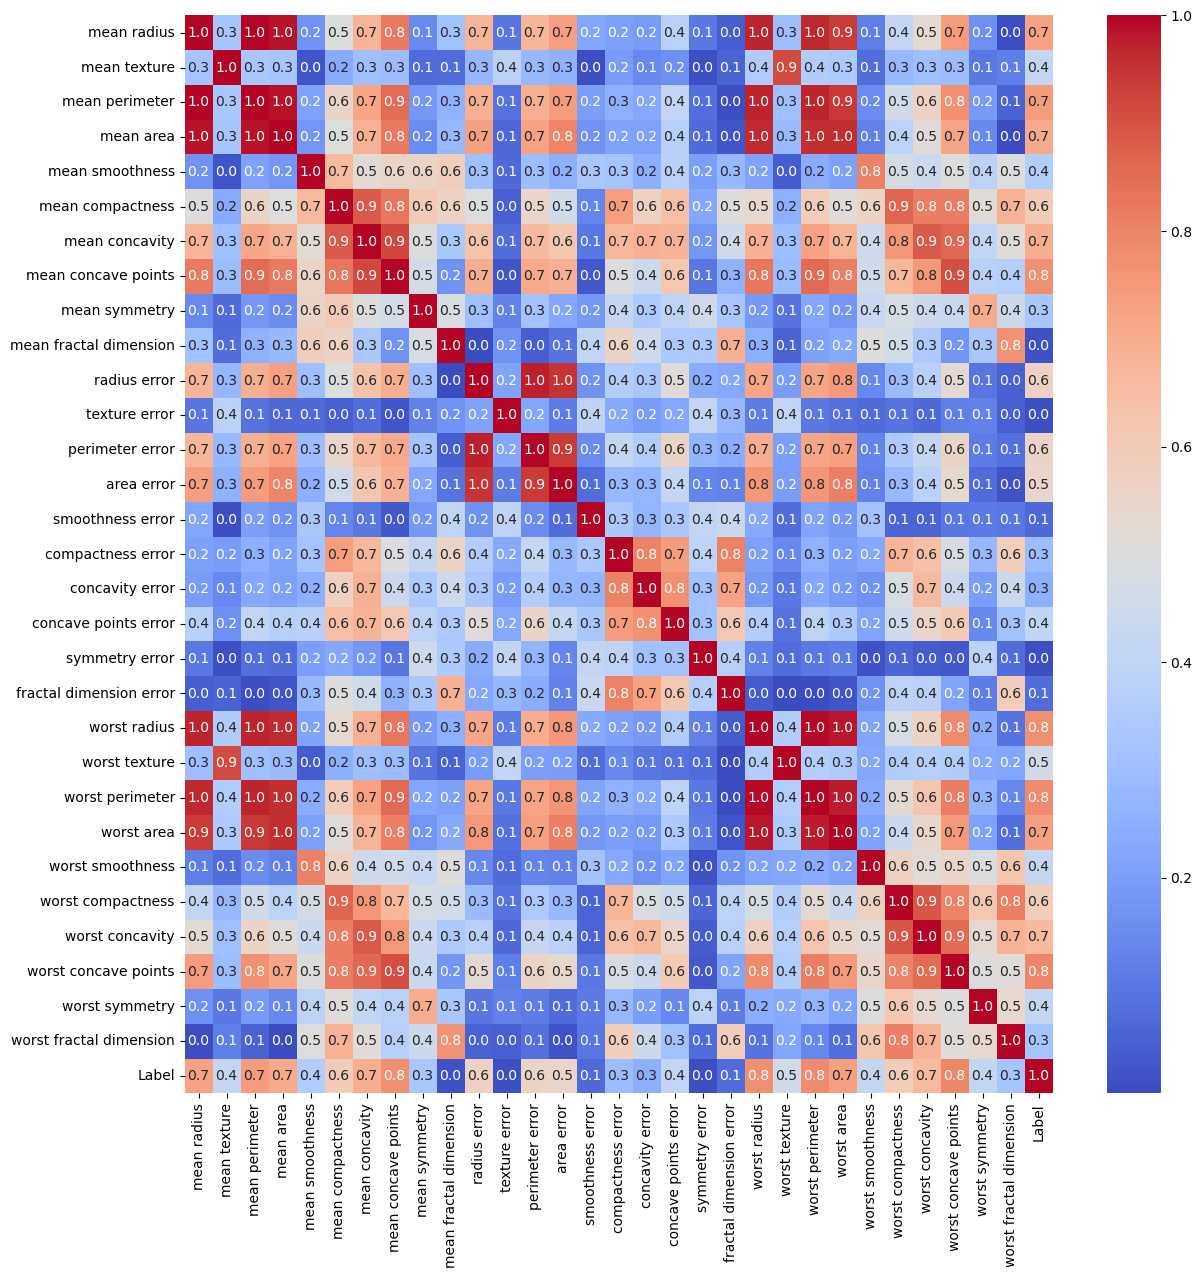

In [20]:
# Correlation Matrix
hF, hA = plt.subplots(figsize = (14, 14))
dfData['Label'] = pd.to_numeric(dfData['Label'])
mC = dfData.corr(method = 'pearson')
sns.heatmap(mC.abs(), cmap = 'coolwarm', annot = True, fmt = '2.1f', ax = hA)

plt.show()

* <font color='red'>(**?**)</font> Are there redundant features? Think in the context of PCA.

## Pre Processing

In [21]:
# Standardize the Data
# Make each feature: Zero Mean, Unit Variance.

#===========================Fill This===========================#
# 1. Construct the standard scaler.
# 2. Apply it to data.
?????
#===============================================================#

Object `???` not found.


## Applying Dimensionality Reduction - PCA 

The common usage for _Dimensionality Reduction_:

1. Noise Reduction (Increase SNR).
2. Compute Efficiency.
3. Visualization.
4. Feature Engineering Step (Usually as _Manifold Learning_).

In [22]:
# Applying the PCA Model

#===========================Fill This===========================#
# 1. Construct the PCA model.
# 2. Apply it to data.
oPCA = ???
mZ   = ???
#===============================================================#

SyntaxError: invalid syntax (128700830.py, line 6)

### Plot Data in 2D

One useful use of _Dimensionality Reduction_ is visualizing _high dimensional_ data.

In [ ]:
# Plot the 2D Result

hA = PlotScatterData(mZ, vY)

* <font color='brown'>(**#**)</font> The _optimal_ Dimensionality Reduction is the perfect feature engineering.
* <font color='brown'>(**#**)</font> Dimensionality Reduction is usually used as a step in pipeline.
* <font color='red'>(**?**)</font> Can we use _Clustering_ as a dimensionality reduction?

## Pipeline with PCA

In this section we'll build a simple pipeline:

 - Apply `PCA` with 2 components.
 - Apply Linear Classifier.

We'll tweak the model with selecting the best features as an input to the `PCA`.  
To do that we'll use the [`SequentialFeatureSelector`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html#sklearn.feature_selection.SequentialFeatureSelector) object of SciKit Learn.  

Selecting features sequentially is a compute intensive operation.  
Hence we can use when the following assumptions hold:

1. The number of features is modest (< 100).
2. The cross validation loop (The estimator / pipeline `fit()` and `predict()`) process is fast.

Of course the time budget and computing budget are also main factors.


In [ ]:
# Building the Pipeline

#===========================Fill This===========================#
# 1. Construct a pipeline with the first operation being PCA and then Logistic Regressor.
# 2. Set the `n_components` and `C` hyper parameters.
oPipeCls = Pipeline([('PCA', PCA(n_components = ???)), ('Classifier', LogisticRegression(C = ???))])
#===============================================================#

In [ ]:
# Base Line Score

#===========================Fill This===========================#
# 1. Compute the base line score (Accuracy) as the mean of the output of `cross_val_score`.
scoreAccBase = ???
#===============================================================#

* <font color='red'>(**?**)</font> What are the issues with `cross_val_score`? Think the cases where folds are not evenly divided or the score is not linear.

In [ ]:
# Selecting the Features

#===========================Fill This===========================#
# 1. Construct the `SequentialFeatureSelector` object by setting the (Use the parameters defined above):
#   - `estimator`.
#   - `n_features_to_select`.
#   - `direction`.
#   - `cv`.
# 2. Fit it to data.
# !! Set `direction` wisely. Pay attention that `PCA` with `numComp` components requires at least `numComp` features (Assuming `numSamples` > `numFeatures`).
oFeatSelector = SequentialFeatureSelector(estimator = ???, n_features_to_select = ???, direction = ???, cv = ???)
oFeatSelector = ???
#===============================================================#

In [ ]:
# Extracting Selected Features
vSelectedFeat = oFeatSelector.get_support()

* <font color='red'>(**?**)</font> How should we use the above results in production?

In [ ]:
# Optimized Score

#===========================Fill This===========================#
# 1. Compute the optimized score (Accuracy) as the mean of the output of `cross_val_score`.
# 2. Select the features from `vSelectedFeat`.
scoreAccOpt = ???
#===============================================================#

In [ ]:
# Comparing Results

print(f'The base line score (Accuracy): {scoreAccBase:0.2%}.')
print(f'The optimized score (Accuracy): {scoreAccOpt:0.2%}.')

In [ ]:
# The Selected Features

dfX.columns[vSelectedFeat]

* <font color='red'>(**?**)</font> Look at the correlation matrix, how correlated are the selected features relative to other?
* <font color='red'>(**?**)</font> Given the pipeline above, can we think on a more efficient way to select features?
* <font color='green'>(**@**)</font> Optimize all hyper parameters of the model: `n_features_to_select`, `n_components` and `C`.